In [26]:
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix
import pickle
import seaborn as sns

In [27]:
url = "IMDB_Dataset.csv"
df = pd.read_csv(url)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [28]:
df.shape

(50000, 2)

In [24]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [29]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [30]:
import re
clean = re.compile('<.*?>')
re.sub(clean, '', df.iloc[2].review)

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [31]:
def clean_html(text):
  clean = re.compile('<.*?>')
  return re.sub(clean, '', text)

In [32]:
df['review']=df['review'].apply(clean_html)

In [33]:
def convert_lower(text): 
  return text.lower()

In [34]:
df['review']=df['review'].apply(convert_lower)

In [35]:
def remove_special(text):
  x=' '

  for i in text:
    if i.isalnum():
      x=x+i
    else:
      x=x + ' '
  return x

In [11]:
df['review']=df['review'].apply(remove_special)
df

,review,sentiment
0,one of the other reviewers has mentioned that...,1
1,a wonderful little production the filming te...,1
2,i thought this was a wonderful way to spend t...,1
3,basically there s a family where a little boy...,0
4,petter mattei s love in the time of money i...,1
...,...,...
49995,i thought this movie did a down right good jo...,1
49996,bad plot bad dialogue bad acting idiotic d...,0
49997,i am a catholic taught in parochial elementar...,0
49998,i m going to have to disagree with the previo...,0


In [36]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]
    

In [38]:
df['review']=df['review'].apply(rem_stopwords)

In [39]:
df

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, ., filming, te...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, 's, family, little, boy, (, jake, ...",0
4,"[petter, mattei, 's, ``, love, time, money, ''...",1
...,...,...
49995,"[thought, movie, right, good, job, ., n't, cre...",1
49996,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ...",0
49997,"[catholic, taught, parochial, elementary, scho...",0
49998,"['m, going, disagree, previous, comment, side,...",0


In [40]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [41]:
y=[]
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z

In [42]:
def stem_txt(text):
    ps = PorterStemmer('english')
    return " ".join([ps.stem(w) for w in text])

In [43]:
df['review']=df['review'].apply(stem_words)


In [44]:
df

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, '...",1
1,"[wonder, littl, product, ., film, techniqu, un...",1
2,"[thought, wonder, way, spend, time, hot, summe...",1
3,"[basic, 's, famili, littl, boy, (, jake, ), th...",0
4,"[petter, mattei, 's, ``, love, time, money, ''...",1
...,...,...
49995,"[thought, movi, right, good, job, ., n't, crea...",1
49996,"[bad, plot, ,, bad, dialogu, ,, bad, act, ,, i...",0
49997,"[cathol, taught, parochi, elementari, school, ...",0
49998,"['m, go, disagre, previou, comment, side, malt...",0


In [45]:
def join_back(list_input):
 return " ".join(list_input)

In [46]:
df['review']=df['review'].apply(join_back)

In [47]:
df

,review,sentiment
0,one review mention watch 1 oz episod 'll hook ...,1
1,wonder littl product . film techniqu unassumin...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic 's famili littl boy ( jake ) think 's zo...,0
4,petter mattei 's `` love time money '' visual ...,1
...,...,...
49995,thought movi right good job . n't creativ orig...,1
49996,"bad plot , bad dialogu , bad act , idiot direc...",0
49997,"cathol taught parochi elementari school nun , ...",0
49998,'m go disagre previou comment side maltin one ...,0


In [48]:
X=df.iloc[:,0:1].values

In [49]:
X.shape

(50000, 1)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=211)

In [77]:
X=cv.fit_transform(df['review']).toarray()

In [78]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
X.shape

(50000, 211)

In [80]:
y=df.iloc[:,-1].values

In [81]:
y.shape

(50000,)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [83]:
X_train.shape

(40000, 211)

In [84]:
X_test.shape

(10000, 211)

In [85]:
y_train.shape

(40000,)

In [86]:
y_test.shape

(10000,)

Gaussian 0.7826
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      5030
           1       0.81      0.73      0.77      4970

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



<AxesSubplot:>

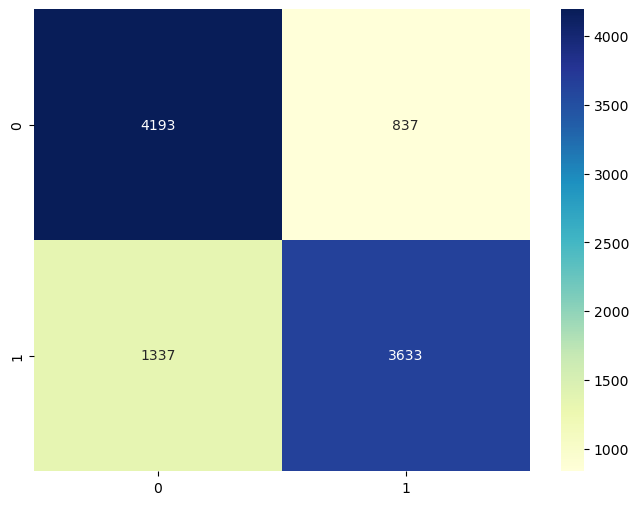

In [59]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(X_train,y_train)
y_pred1=model_nb.predict(X_test)
y_test.shape
y_pred1.shape
print("Gaussian",accuracy_score(y_test,y_pred1))
print(classification_report(y_test, y_pred1))

cm = confusion_matrix(y_test, y_pred1)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Decision Tree Model, Accuracy (Train Set) :  0.81315
Decision Tree Model, Accuracy (Test Set) :  0.7443
              precision    recall  f1-score   support

           0       0.80      0.66      0.72      5030
           1       0.71      0.83      0.76      4970

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



<AxesSubplot:>

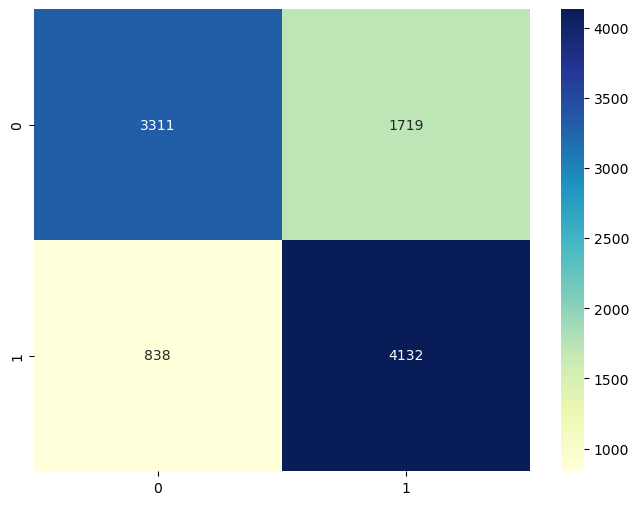

In [60]:
from sklearn.tree import DecisionTreeClassifier
maximum_tree_depth= 15
model_dt = DecisionTreeClassifier(max_depth=maximum_tree_depth)
model_dt.fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)

accuracy_train_set = model_dt.score(X_train, y_train)
accuracy_test_set = model_dt.score(X_test, y_test)
print("Decision Tree Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Decision Tree Model, Accuracy (Test Set) : ", accuracy_test_set)

print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Logistic Regression Model, Accuracy (Train Set) :  0.7937
Logistic Regression Model, Accuracy (Test Set) :  0.7898
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      5069
           1       0.78      0.80      0.79      4931

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



<AxesSubplot:>

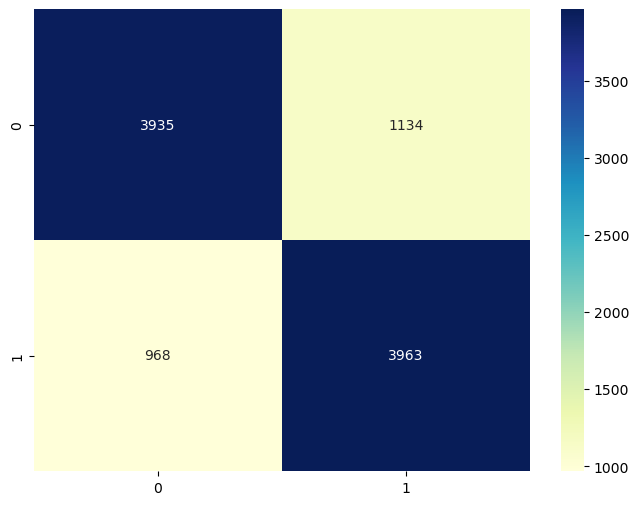

In [87]:
from sklearn.linear_model import LogisticRegression 
l2_norm = 0.4 # regularization parameter
l2_norm_inverse = 1/l2_norm 
maximum_iterations=4000
model_lr = LogisticRegression(C=l2_norm_inverse,max_iter=maximum_iterations)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

accuracy_train_set = model_lr.score(X_train, y_train)
accuracy_test_set = model_lr.score(X_test, y_test)
print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Logistic Regression Model, Accuracy (Test Set) : ", accuracy_test_set)
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [530]:
from sklearn.ensemble import StackingClassifier


In [532]:
esti=[('nb', model_nb), ('dt', model_dt), ('lr', model_lr)]
f_estimator=model_lr

sclf = StackingClassifier(estimators = esti, final_estimator = f_estimator)
sclf.fit(X_train, y_train)
y_pred_sclf = sclf.predict(X_test)
accuracy_test_set = sclf.score(X_test, y_test)
print(" Accuracy : ", accuracy_test_set)

 Accuracy :  0.793


In [255]:
inputr = "A young girl's five emotions try to solve her identity crisis caused by moving, but when the wrong levers in brain's control center are pushed, things go awry.That synopsis made me push watching this further and further ahead to, but I loved Docter's masterpiece Up so I had to watch this in a theater while I still could. Me and my partner thought, well, not really expecting much, so it will probably be OK. But oh what a disappointment it was. OK, I admit we are not teens. And love Japanese animation. And I do not appreciate Disney because of their marketing bonanza and ill-fitting gender stereotypes. But this film is so chock-full of fantasy-killing and misguided ideological messages that I am flabbergasted. It is beyond me how so little viewers find offense with the messages, and that these are thoroughly inappropriate for kids.Like for instance: 1) You are not in control of your emotions, your emotions control you. 2) Thought and reason have no influence at all on your decisions. 3) If you do not keep your emotions in check, you will lose your memories. If you lose your memories, you will become emotionally unresponsive. 4) There is only one good emotion (joy). There are four negative ones (sadness, anger, disgust, fear). That is it. That is what everyone feels. To hell with love. Or desire. Or curiosity. Or faith. 5) In order to grow up, your joyful memories have to become sad memories. Why? Good question. That is the climax of the movie and there is no explanation why this should be the case.None of this makes any sense. The whole plot is completely incoherent. These messages hold no educational value whatsoever. And strangely this seems to be more obvious to children than to adults - I heard a boy asking his parents what any of that was supposed to mean.This is obviously made and marketed for tech-savvy young parents who think they should take their kids to something more challenging than Planes 2. The parents look like what an ad exec at Disney imagines Google employees to look like - mom wears cute specs, dad a hipster beard and it is set in San Francisco on top of that. The whole thing is probably the most in-your-face marketing device posing for a movie that I have ever seen. And everybody seems to be literally buying it.Well, not everybody. Some of the reviewers here do have similar issues, so all is not lost for the human race. If you care for an alternative story about a girl away from home struggling to adapt, there is the fantastic new Ghibli feature When Marnie was there. That film has everything Inside Out has not: a story, believable characters, imagination, mystery, and most importantly: heart."

In [256]:
inputt = pd.Series(inputr)
inputt

0    A young girl's five emotions try to solve her ...
dtype: object

In [257]:
inputt = remove_special(inputr)

In [258]:
inputt

' A young girl s five emotions try to solve her identity crisis caused by moving  but when the wrong levers in brain s control center are pushed  things go awry That synopsis made me push watching this further and further ahead to  but I loved Docter s masterpiece Up so I had to watch this in a theater while I still could  Me and my partner thought  well  not really expecting much  so it will probably be OK  But oh what a disappointment it was  OK  I admit we are not teens  And love Japanese animation  And I do not appreciate Disney because of their marketing bonanza and ill fitting gender stereotypes  But this film is so chock full of fantasy killing and misguided ideological messages that I am flabbergasted  It is beyond me how so little viewers find offense with the messages  and that these are thoroughly inappropriate for kids Like for instance  1  You are not in control of your emotions  your emotions control you  2  Thought and reason have no influence at all on your decisions  3

In [259]:
inputt = rem_stopwords(inputt)

In [260]:
inputt

['A',
 'young',
 'girl',
 'five',
 'emotions',
 'try',
 'solve',
 'identity',
 'crisis',
 'caused',
 'moving',
 'wrong',
 'levers',
 'brain',
 'control',
 'center',
 'pushed',
 'things',
 'go',
 'awry',
 'That',
 'synopsis',
 'made',
 'push',
 'watching',
 'ahead',
 'I',
 'loved',
 'Docter',
 'masterpiece',
 'Up',
 'I',
 'watch',
 'theater',
 'I',
 'still',
 'could',
 'Me',
 'partner',
 'thought',
 'well',
 'really',
 'expecting',
 'much',
 'probably',
 'OK',
 'But',
 'oh',
 'disappointment',
 'OK',
 'I',
 'admit',
 'teens',
 'And',
 'love',
 'Japanese',
 'animation',
 'And',
 'I',
 'appreciate',
 'Disney',
 'marketing',
 'bonanza',
 'ill',
 'fitting',
 'gender',
 'stereotypes',
 'But',
 'film',
 'chock',
 'full',
 'fantasy',
 'killing',
 'misguided',
 'ideological',
 'messages',
 'I',
 'flabbergasted',
 'It',
 'beyond',
 'little',
 'viewers',
 'find',
 'offense',
 'messages',
 'thoroughly',
 'inappropriate',
 'kids',
 'Like',
 'instance',
 '1',
 'You',
 'control',
 'emotions',
 'emoti

In [261]:
inputt = join_back(inputt)

In [262]:
inputt

'A young girl five emotions try solve identity crisis caused moving wrong levers brain control center pushed things go awry That synopsis made push watching ahead I loved Docter masterpiece Up I watch theater I still could Me partner thought well really expecting much probably OK But oh disappointment OK I admit teens And love Japanese animation And I appreciate Disney marketing bonanza ill fitting gender stereotypes But film chock full fantasy killing misguided ideological messages I flabbergasted It beyond little viewers find offense messages thoroughly inappropriate kids Like instance 1 You control emotions emotions control 2 Thought reason influence decisions 3 If keep emotions check lose memories If lose memories become emotionally unresponsive 4 There one good emotion joy There four negative ones sadness anger disgust fear That That everyone feels To hell love Or desire Or curiosity Or faith 5 In order grow joyful memories become sad memories Why Good question That climax movie e

In [263]:
inputt = [inputt]

In [264]:
from sklearn import *
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [265]:
i = cv.fit(inputt)
print(i.vocabulary_)

{'young': 210, 'girl': 75, 'five': 68, 'emotions': 49, 'try': 195, 'solve': 168, 'identity': 87, 'crisis': 35, 'caused': 24, 'moving': 130, 'wrong': 208, 'levers': 108, 'brain': 19, 'control': 33, 'center': 25, 'pushed': 153, 'things': 188, 'go': 76, 'awry': 12, 'that': 182, 'synopsis': 178, 'made': 117, 'push': 152, 'watching': 201, 'ahead': 4, 'loved': 116, 'docter': 45, 'masterpiece': 122, 'up': 197, 'watch': 200, 'theater': 184, 'still': 173, 'could': 34, 'me': 123, 'partner': 147, 'thought': 192, 'well': 203, 'really': 156, 'expecting': 56, 'much': 131, 'probably': 151, 'ok': 140, 'but': 20, 'oh': 139, 'disappointment': 42, 'admit': 2, 'teens': 181, 'and': 6, 'love': 115, 'japanese': 102, 'animation': 8, 'appreciate': 9, 'disney': 44, 'marketing': 120, 'bonanza': 17, 'ill': 90, 'fitting': 67, 'gender': 73, 'stereotypes': 172, 'film': 65, 'chock': 30, 'full': 72, 'fantasy': 61, 'killing': 107, 'misguided': 127, 'ideological': 88, 'messages': 126, 'flabbergasted': 69, 'it': 101, 'be

In [266]:
i=cv.transform(inputt)
i.toarray()

array([[1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3,
        1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 3, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 5, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2]], dtype=int64)

In [267]:
i

<1x211 sparse matrix of type '<class 'numpy.int64'>'
	with 211 stored elements in Compressed Sparse Row format>

In [268]:
predtt = model_lr.predict(i)

In [269]:
predtt

array([0], dtype=int64)

In [1]:
!pip install streamlit

^C


In [103]:
import streamlit as st

In [104]:
import pickle
movier = 'logisticregression.pkl'
pickle.dump(model_lr, open(movier, 'wb'))